# Prediction of bikes rented

## Import Libraries and Data

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
import time

In [385]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [386]:
df['Date'] = pd.to_datetime(df['datetime'])
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayowk'] = df['Date'].dt.dayofweek
df['hour'] = df['Date'].dt.hour
df.drop('datetime',axis=1,inplace = True)
df.drop('Date',axis=1,inplace = True)

No null values

In [387]:
df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
Month         0
year          0
dayowk        0
hour          0
dtype: int64

In [388]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,year,dayowk,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,5,4


In [306]:
df_test = pd.read_csv('test.csv')
df_test['Date'] = pd.to_datetime(df_test['datetime'])
df_test['Month'] = df_test['Date'].dt.month
df_test['year'] = df_test['Date'].dt.year
df_test['dayowk'] = df_test['Date'].dt.dayofweek
df_test['hour'] = df_test['Date'].dt.hour
df_test.drop('datetime',axis=1,inplace = True)
df_test.drop('Date',axis=1,inplace = True)

In [391]:
X_feat = df.drop(['casual','registered','count'],axis=1)
y_feat = df[['casual','registered','count']]

In [392]:
X_feat.nunique()

season         4
holiday        2
workingday     2
weather        4
temp          49
atemp         60
humidity      89
windspeed     28
Month         12
year           2
dayowk         7
hour          24
dtype: int64

In [393]:
continuous = X_feat.columns[X_feat.nunique() > 24]
discrete = X_feat.columns[X_feat.nunique() <= 24]

In [394]:
discrete

Index(['season', 'holiday', 'workingday', 'weather', 'Month', 'year', 'dayowk',
       'hour'],
      dtype='object')

### Visualizing the features

/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

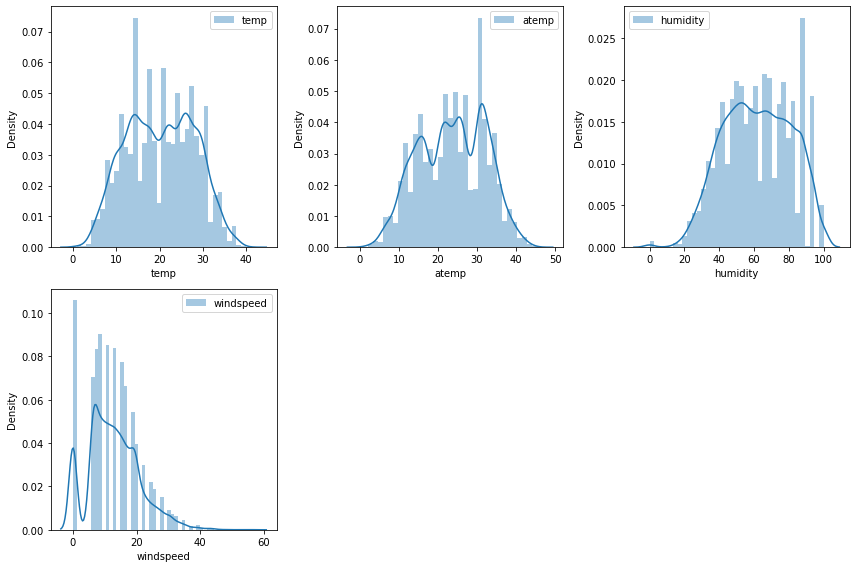

In [395]:
fig = plt.figure(figsize=(12,8))

for i,col in enumerate(continuous):
    plt.subplot(2,3,i+1);
    sns.distplot(X_feat[col],label=str(col));
    plt.legend()
    plt.tight_layout()

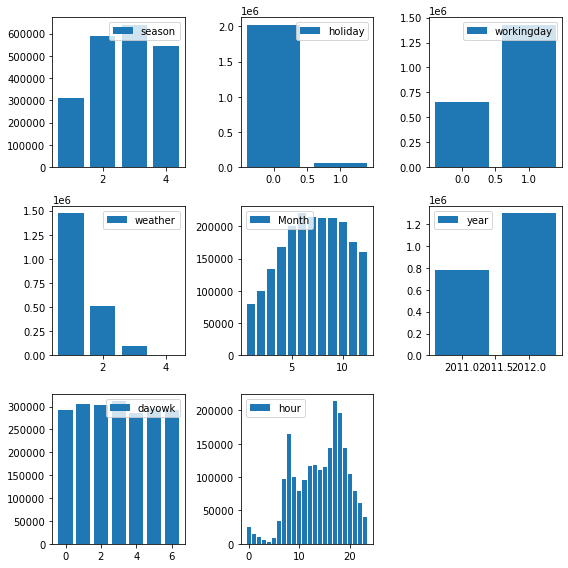

In [397]:
fig = plt.figure(figsize=(8,8))

for i,col in enumerate(discrete):
    plt.subplot(3,3,i+1);
    plt.bar(x = df[col].unique(),height = df.groupby(col)['count'].sum(),label = col);
    plt.legend()
    plt.tight_layout()


### Looking at target distributions

/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

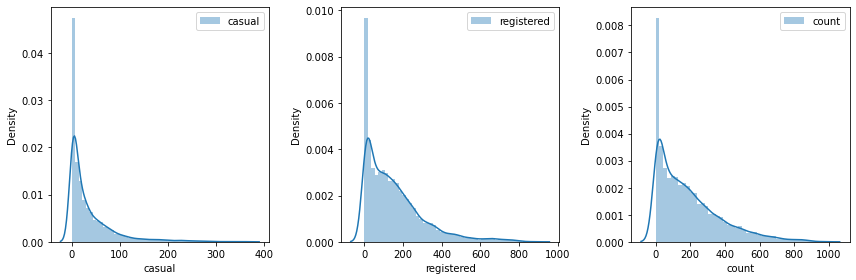

In [400]:
fig = plt.figure(figsize=(12,4))

for i,col in enumerate(['casual','registered','count']):
    plt.subplot(1,3,i+1);
    sns.distplot(y_feat[col],label=str(col));
    plt.legend()
    plt.tight_layout()

<AxesSubplot:>

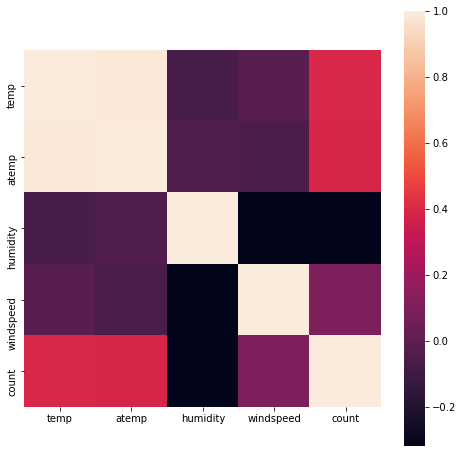

In [398]:
plt.figure(figsize=(8,8))
sns.heatmap(df[np.append(continuous,'count')].corr(),vmax=1.,square=True)

## Random Forest Regressor

In [403]:
submission = pd.read_csv('sampleSubmission.csv')

In [401]:
start = time.time()
y = np.log(1+df['count'])
scaler = StandardScaler()
#X= scaler.fit_transform(pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete))
X= pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

rf_clf = RandomForestRegressor()
rf_param_grid = {
            'n_estimators': [100],
            'criterion': ['mse'],
            'max_depth': [None, 2, 3, 5,10],
            'min_samples_split': [None,5,10],
            'min_samples_leaf': [None,3,5],
        }
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5,n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

y_pred_RF = rf_grid_search.predict(X_test)
mse = mean_squared_error(y_pred_RF,y_test)
print(np.sqrt(mse))
print(time.time()-start)

0.3385685153331488
28.855823040008545


In [ ]:
X_sub = pd.get_dummies(df_test,columns=discrete)
y_sub_RF = rf_grid_search.predict(X_sub)
y_sub_final = np.exp(y_sub_RF) - 1

submission['count'] = y_sub_final

submission.to_csv('RF.csv',index=False)

## XGBoost

In [407]:
start = time.time()
y = np.log(1+df['count'])
scaler = StandardScaler()
#X= scaler.fit_transform(pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete))
X= pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

xg = xgb.XGBRegressor(objective= 'reg:squarederror',)
xgb_param_grid = {
            'max_depth': range (2, 10, 2),
            'n_estimators': range(20, 120, 20),
            'learning_rate': [0.001,0.01, 0.1]
        }
xgb_grid_search = GridSearchCV(
            estimator=xg,
            param_grid=xgb_param_grid,
            n_jobs = -1,
            cv = 5,
            verbose=False
        )

xgb_grid_search.fit(X_train,y_train)
y_pred_xgb = xgb_grid_search.predict(X_test)
mse = mean_squared_error(y_pred_xgb,y_test)
print(np.sqrt(mse))
print(time.time()-start)

0.3228081128667652
64.05141925811768


In [420]:
lineardata = {'RF':rf_grid_search.predict(X_train), 'XGB': xgb_grid_search.predict(X_train)}
X_lin =pd.DataFrame.from_dict(lineardata)
y_lin = y_train
reg = LinearRegression().fit(X_lin, y_lin)
coefs = reg.coef_

In [421]:
lineardata = {'RF':y_pred_RF, 'XGB': y_pred_xgb}
X_lin =pd.DataFrame.from_dict(lineardata)
y_lin = y_test
reg = LinearRegression().fit(X_lin, y_lin)
print(reg.coef_)

[0.35394871 0.67639882]


In [425]:
y_pred_RF-y_test

3133     0.075915
5786    -0.770791
5224    -0.163668
8953    -0.168945
8054    -0.210940
           ...   
1963     0.002068
5807     0.249728
10061   -0.164121
5427    -0.024457
7588    -0.257776
Name: count, Length: 2178, dtype: float64

In [428]:
y_test_comb = (1*y_pred_RF + 0*y_pred_xgb)
mse = mean_squared_error(y_pred_RF,y_test)
print(mse)

0.11462863957489261


In [430]:
X_sub = pd.get_dummies(df_test,columns=discrete)
y_sub_RF = rf_grid_search.predict(X_sub)
y_sub_xgb = xgb_grid_search.predict(X_sub)

y_sub_final = (coefs[0]*y_sub_RF + coefs[1]*y_sub_xgb)/(coefs[0]+coefs[1])

submission['count'] = np.exp(y_sub_final)-1

submission.to_csv('RF_xgb_linearcomb.csv',index=False)

### Registered only

In [325]:
start = time.time()
y = np.log(1+df['registered'])
scaler = StandardScaler()
#X= scaler.fit_transform(pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete))
X= pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

rf_clf = RandomForestRegressor()
rf_param_grid = {
            'n_estimators': [100],
            'criterion': ['mse'],
            'max_depth': [None, 2, 3, 5,10],
            'min_samples_split': [None,5,10],
            'min_samples_leaf': [None,3,5]
        }
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5,n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

y_pred_RF = rf_grid_search.predict(X_test)
mse = mean_squared_error(y_pred_RF,y_test)
print(np.sqrt(mse))
print(time.time()-start)

0.31749822150554863
28.4130859375


In [431]:
start = time.time()
y = np.log(1+df['registered'])
scaler = StandardScaler()
#X= scaler.fit_transform(pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete))
X= pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

xg = xgb.XGBRegressor(objective= 'reg:squarederror',)
xgb_param_grid = {
            'max_depth': range (2, 10, 2),
            'n_estimators': range(20, 120, 20),
            'learning_rate': [0.001,0.01, 0.1]
        }
xgb_grid_search_reg = GridSearchCV(
            estimator=xg,
            param_grid=xgb_param_grid,
            n_jobs = -1,
            cv = 5,
            verbose=False
        )

xgb_grid_search_reg.fit(X_train,y_train)
y_pred_xgb_reg = xgb_grid_search_reg.predict(X_test)
mse = mean_squared_error(y_pred_xgb_reg,y_test)
print(np.sqrt(mse))
print(time.time()-start)

0.315977711184292
64.2020308971405


### Casual Only

In [369]:
start = time.time()
y = np.log(1+df['casual'])
scaler = StandardScaler()
#X= scaler.fit_transform(pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete))
X= pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

xg = xgb.XGBRegressor(objective= 'reg:squarederror',)
xgb_param_grid = {
            'max_depth': range (2, 10, 2),
            'n_estimators': range(20, 120, 20),
            'learning_rate': [0.001,0.01, 0.1]
        }
xgb_grid_search_cas = GridSearchCV(
            estimator=xg,
            param_grid=xgb_param_grid,
            n_jobs = -1,
            cv = 5,
            verbose=False
        )

xgb_grid_search_cas.fit(X_train,y_train)
y_pred_xgb_cas = xgb_grid_search_cas.predict(X_test)
mse = mean_squared_error(y_pred_xgb_cas,y_test)
print(np.sqrt(mse))
print(time.time()-start)

/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.5102251241009166
60.82933688163757


### Adding registered and casual

In [432]:
y_pred_reg_cas = np.log((np.exp(y_pred_xgb_reg)-1 + np.exp(y_pred_xgb_cas)-1)+1)

y = np.log(1+df['count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)
mse = mean_squared_error(y_pred_reg_cas,y_test)
print(np.sqrt(mse))

0.31293280018695363


In [372]:
y_sub_xgb_reg = xgb_grid_search_reg.predict(X_sub)
y_sub_xgb_cas = xgb_grid_search_cas.predict(X_sub)
y_sub_reg_cas = np.log((np.exp(y_sub_xgb_reg)-1 + np.exp(y_sub_xgb_cas)-1)+1)
submission['count'] = np.exp(y_sub_reg_cas) -1
submission.to_csv('xgb_separate.csv',index=False)

### Adding registered output as input to casual

In [381]:
start = time.time()
y = np.log(1+df['casual'])
scaler = StandardScaler()
#X= scaler.fit_transform(pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete))
X= pd.get_dummies(df.drop(['casual','registered','count'],axis=1), columns = discrete)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

y_pred_train = xgb_grid_search_reg.predict(X_train)
y_pred_test = xgb_grid_search_reg.predict(X_test)

X_train['predicted_reg'] = y_pred_train
X_test['predicted_reg'] = y_pred_test

xg = xgb.XGBRegressor(objective= 'reg:squarederror',)
xgb_param_grid = {
            'max_depth': range (2, 10, 2),
            'n_estimators': range(20, 120, 20),
            'learning_rate': [0.001,0.01, 0.1]
        }
xgb_grid_search_cas = GridSearchCV(
            estimator=xg,
            param_grid=xgb_param_grid,
            n_jobs = -1,
            cv = 5,
            verbose=False
        )

xgb_grid_search_cas.fit(X_train,y_train)
y_pred_xgb_cas = xgb_grid_search_cas.predict(X_test)
mse = mean_squared_error(y_pred_xgb_cas,y_test)
print(np.sqrt(mse))
print(time.time()-start)

<ipython-input-381-7726a83002cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['predicted_reg'] = y_pred_train
<ipython-input-381-7726a83002cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predicted_reg'] = y_pred_test
/Users/akshayghalsasi/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.wa

0.4955180631781167
64.96817779541016


In [382]:
y_pred_reg_cas = np.log((np.exp(y_pred_xgb_reg)-1 + np.exp(y_pred_xgb_cas)-1)+1)

y = np.log(1+df['count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)
mse = mean_squared_error(y_pred_reg_cas,y_test)
print(np.sqrt(mse))

0.3131515920790358


## Visualization of casual

In [ ]:
fig = plt.figure(figsize=(12,12))

for i,col in enumerate(discrete):
    plt.subplot(3,3,i+1);
    plt.bar(x = df[col].unique(),height = df.groupby(col)['casual'].sum(),label = col);
    plt.legend()
    plt.tight_layout()


plt.plot(df[df['weather'] == 1]['registered'],df[df['weather'] == 1]['casual'],'o')